<a href="https://colab.research.google.com/github/amirntz/Machine-learning-2023/blob/main/mini_projct_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 15Z0exlyKDYVMI2oY-2qbOt9msu3f28Zz
# https://drive.google.com/file/d/15Z0exlyKDYVMI2oY-2qbOt9msu3f28Zz/view?usp=sharing

In [ ]:
data = pd.read_csv('/content/Perceptron.csv')
data

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == -1, 0, 1)
print(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1/(1+np.exp(-x))


def tanh(x):
    return np.tanh(x)

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))


def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc


In [ ]:
# class Neuron:

#     def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
#         self.in_features = in_features
#         # weight & bias
#         self.w = np.random.randn(in_features, 1)
#         self.b = np.random.randn()
#         self.af = af
#         self.loss_fn = loss_fn
#         self.loss_hist = []
#         self.w_grad, self.b_grad = None, None
#         self.n_iter = n_iter
#         self.eta = eta
#         self.verbose = verbose

#     def predict(self, x):
#         # x: [n_samples, in_features]
#         y_hat = x @ self.w
#         y_hat = y_hat if self.af is None else self.af(y_hat)
#         return y_hat

#     def fit(self, x, y):
#         for i in range(self.n_iter):
#             #model
#             y_hat = self.predict(x)
#             #loss
#             loss = self.loss_fn(y, y_hat)
#             self.loss_hist.append(loss)
#             #grad
#             self.gradient(x, y, y_hat)
#             #optimize
#             self.gradient_descent()
#             #print results
#             if self.verbose & (i % 10 == 0):
#                 print(f'Iter={i}, Loss={loss:.4}')

#     def gradient(self, x, y, y_hat):
#         self.w_grad = (x.T @ (y_hat - y)) / len(y)
#         self.b_grad = (y_hat - y).mean()

#     def gradient_descent(self):
#         self.w -= self.eta * self.w_grad
#         self.b -= self.eta * self.b_grad

#     def __repr__(self):
#         return f'Neuron({self.in_features}, {self.af.__name__})'

#     def parameters(self):
#         return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.fit(X_train, y_train[:, None])

Iter=0, Loss=0.1383
Iter=10, Loss=0.06887
Iter=20, Loss=0.04141
Iter=30, Loss=0.02811
Iter=40, Loss=0.02066
Iter=50, Loss=0.01603
Iter=60, Loss=0.01294
Iter=70, Loss=0.01075
Iter=80, Loss=0.009143
Iter=90, Loss=0.007917


In [ ]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [ ]:
plot_decision_regions(X_test, y_test, clf=neuron)

2

In [ ]:
import numpy as np
import itertools

In [ ]:
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
def DFA1(input_1 , input_2):

  n1 = McCulloch_Pitts_neuron([-1, 2 , 2, 0] , 3.5)
  n2 = McCulloch_Pitts_neuron([0, 2 , 2, -1] , 3.5)
  n3 = McCulloch_Pitts_neuron([2, -1 , 0, 2] , 3.5)
  n4 = McCulloch_Pitts_neuron([2, 0 , -1, 2] , 3.5)

  w0 = n1.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  w1 = n2.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  w2 = n3.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  w3 = n4.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  return list([w0,w1,w2,w3])

In [ ]:
def DFA2(input_1 , input_2):

  n5 = McCulloch_Pitts_neuron([1, 1 , 1, 1] , 3.5)
  n6 = McCulloch_Pitts_neuron([3, -1 , 3, -2] , 3.5)
  n7 = McCulloch_Pitts_neuron([0, 2 , 0, 2] , 3.5)

  z3 = n5.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  z2 = n6.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))
  z0 = n7.model(np.array([input_1[0], input_1[1] , input_2[0], input_2[1]]))

  return list([z0,z2,z3])

In [ ]:
def DFA3(input):

  n8 = McCulloch_Pitts_neuron([4, 4 , 4, 4] , 3.5)

  z1 = n8.model(np.array([input[0], input[1] , input[2], input[3]]))
  return z1

In [ ]:
import itertools
state_b = [0, 1]
input = [0, 1]
y = list(itertools.product(state_b, state_b))
y

h = list(itertools.product(input, input))
h

X = list(itertools.product(y, h))
print(X)

[((0, 0), (0, 0)), ((0, 0), (0, 1)), ((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 1), (0, 0)), ((0, 1), (0, 1)), ((0, 1), (1, 0)), ((0, 1), (1, 1)), ((1, 0), (0, 0)), ((1, 0), (0, 1)), ((1, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (0, 0)), ((1, 1), (0, 1)), ((1, 1), (1, 0)), ((1, 1), (1, 1))]


In [ ]:
a=[]
for i in X:
    res1 = DFA1(i[0],i[1])
    a.append(res1)
    print(res1)
print(a)

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 1, 0, 0]
[1, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]
[0, 0, 0, 0]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0]]


In [ ]:
z0=[]
z2=[]
z3=[]

for i in X:
    res2 = DFA2(i[0],i[1])
    z0.append(res2[0])
    z2.append(res2[1])
    z3.append(res2[2])

    print(res2)
print(z0)
print(z2)
print(z3)

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
z1=[]
for i in a:
    res3 = DFA3(i)
    z1.append(res3)
    print(res3)
print(z1)

0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
0
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]


In [ ]:
for i in range(0,16):
   print(z3[i],z2[i],z1[i],z0[i])


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 1
0 0 1 0
0 0 1 1
0 0 0 0
0 0 1 0
0 1 0 0
0 1 1 0
0 0 0 0
0 0 1 1
0 1 1 0
1 0 0 1


3-1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 185esIGf7MAuuJxdeAOJeClApcNvBEVug
!unzip PersianData.zip
# https://drive.google.com/file/d/185esIGf7MAuuJxdeAOJeClApcNvBEVug/view?usp=sharing

In [216]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


3-2

In [105]:
def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

missing_points5.jpg
Output Vectors Table:
0.008626 0.008421 0.008282 0.008655 0.008676 
0.000000 0.000000 0.000000 0.000000 0.000000 
0.000000 0.000000 0.000000 0.000000 0.000000 
Last Output Vector: 4.76640000000001e-16 1.814399999999993e-16 0 5.184000000000008e-16 5.48639999999999e-16
The highest positive output value is associated with class 5


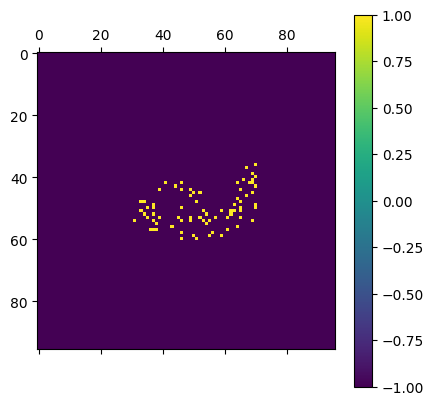

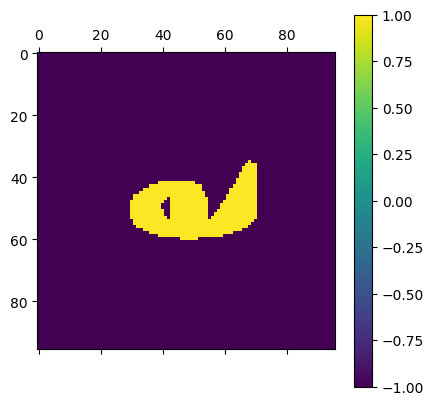

In [230]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/missing_points5.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)

    plt.colorbar()

    plt.show()


3-3

In [178]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")
def getNoisyBinaryImage(input_path, output_path):
    # باز کردن تصویر اصلی
    original_image = Image.open(input_path)

    # ایجاد ابزار رسم برای تصویر اصلی
    original_draw = ImageDraw.Draw(original_image)

    # باز کردن یک نسخه خالی برای تصویر نویزی
    noisy_image = Image.new("RGB", original_image.size)
    noisy_draw = ImageDraw.Draw(noisy_image)

    # استخراج اطلاعات تصویر اصلی
    width = original_image.size[0]
    height = original_image.size[1]
    original_pix = original_image.load()

    # تعریف فاکتور نویز
    noise_factor = 1000000000000000000

    # حلقه بر روی تمام پیکسل‌های تصویر
    for i in range(width):
        for j in range(height):
            # چک کردن آیا پیکسل مشکی است یا خیر
            if original_pix[i, j] == (0, 0, 0):
                # اگر مشکی بود، مقدار تصادفی اضافه شود
                #rand = random.randint(10, noise_factor)
                red = original_pix[i, j][0] + 1000
                green = original_pix[i, j][1] + 1000
                blue = original_pix[i, j][2] + 1000

                # اطمینان از محدود بودن مقادیر RGB
                red = max(0, min(255, red))
                green = max(0, min(255, green))
                blue = max(0, min(255, blue))

                # تنظیم رنگ پیکسل در تصویر نویزی
                noisy_draw.point((i, j), (red, green, blue))
            else:
                # اگر نقطه سفید بود، همان رنگ را در تصویر نویزی استفاده کن
                 noisy_draw.point((i, j), original_pix[i, j])

    # ذخیره تصویر نویزی
    noisy_image.save(output_path, "JPEG")

    # تمیز کردن ابزار رسم
    del original_draw
    del noisy_draw
generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")
def getNoisyBinaryImage(input_path, output_path):
    # باز کردن تصویر اصلی
    original_image = Image.open(input_path)

    # ایجاد ابزار رسم برای تصویر اصلی
    original_draw = ImageDraw.Draw(original_image)

    # باز کردن یک نسخه خالی برای تصویر نویزی
    noisy_image = Image.new("RGB", original_image.size)
    noisy_draw = ImageDraw.Draw(noisy_image)

    # استخراج اطلاعات تصویر اصلی
    width = original_image.size[0]
    height = original_image.size[1]
    original_pix = original_image.load()

    # تعریف فاکتور نویز
    noise_factor = 1000000000000000000

    # حلقه بر روی تمام پیکسل‌های تصویر
    for i in range(width):
        for j in range(height):
            # چک کردن آیا پیکسل مشکی است یا خیر
            if original_pix[i, j] == (0, 0, 0):
                # اگر مشکی بود، مقدار تصادفی اضافه شود
                #rand = random.randint(10, noise_factor)
                red = original_pix[i, j][0] + 1000
                green = original_pix[i, j][1] + 1000
                blue = original_pix[i, j][2] + 1000

                # اطمینان از محدود بودن مقادیر RGB
                red = max(0, min(255, red))
                green = max(0, min(255, green))
                blue = max(0, min(255, blue))

                # تنظیم رنگ پیکسل در تصویر نویزی
                noisy_draw.point((i, j), (red, green, blue))
            else:
                # اگر نقطه سفید بود، همان رنگ را در تصویر نویزی استفاده کن
                 noisy_draw.point((i, j), original_pix[i, j])

    # ذخیره تصویر نویزی
    noisy_image.save(output_path, "JPEG")

    # تمیز کردن ابزار رسم
    del original_draw
    del noisy_draw
generateNoisyImages()

In [229]:
from PIL import Image, ImageDraw
import random

def generateMissingPointsImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_points_image_path = f"/content/missing_points{i}.jpg"
        getMissingPointsImage(image_path, missing_points_image_path)
        print(f"Image with missing points for {image_path} generated and saved as {missing_points_image_path}")

def getMissingPointsImage(input_path, output_path, num_missing_points=20000):
    """
    Add missing points to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the image with missing points.
        num_missing_points (int): The number of missing points to add.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Add missing points
    for _ in range(num_missing_points):
        # Generate random coordinates
        i = random.randint(0, width - 1)
        j = random.randint(0, height - 1)

        # Set the pixel color to red (255, 0, 0)
        draw.point((i, j), (255, 255, 255))

    # Save the image with missing points
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate images with missing points and save them
generateMissingPointsImages()


Image with missing points for /content/1.jpg generated and saved as /content/missing_points1.jpg
Image with missing points for /content/2.jpg generated and saved as /content/missing_points2.jpg
Image with missing points for /content/3.jpg generated and saved as /content/missing_points3.jpg
Image with missing points for /content/4.jpg generated and saved as /content/missing_points4.jpg
Image with missing points for /content/5.jpg generated and saved as /content/missing_points5.jpg


4_1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1SqRCHdohQEOK9UhwIBZdkgWr-sNo8lEz
# https://drive.google.com/file/d/1SqRCHdohQEOK9UhwIBZdkgWr-sNo8lEz/view?usp=sharing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

4-2

In [7]:
correlation_matrix = df.corr()['price'].sort_values(ascending=False)
correlation_matrix

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

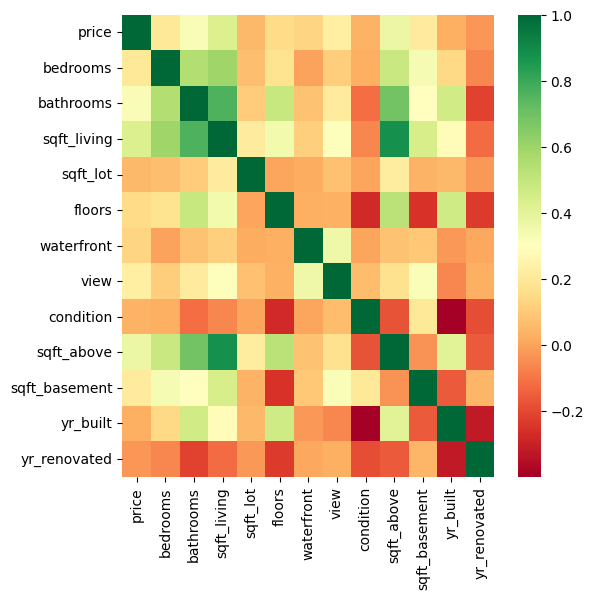

In [10]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

4_3

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['price'], bins=1000, color='blue', edgecolor='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['sqft_living'], bins=1000, color='blue', edgecolor='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('sqft_living')
plt.ylabel('Density')
plt.grid(True)
plt.show()

4_4

In [4]:
date = df["date"]

In [5]:
year=[]
for d in df['date']:
    word = d.split()[0]
    year.append(word)

year = pd.DataFrame(year)
df.insert(2, "year", year[0])
set(df['year'])

{'2014-05-02',
 '2014-05-03',
 '2014-05-04',
 '2014-05-05',
 '2014-05-06',
 '2014-05-07',
 '2014-05-08',
 '2014-05-09',
 '2014-05-10',
 '2014-05-11',
 '2014-05-12',
 '2014-05-13',
 '2014-05-14',
 '2014-05-15',
 '2014-05-16',
 '2014-05-17',
 '2014-05-18',
 '2014-05-19',
 '2014-05-20',
 '2014-05-21',
 '2014-05-22',
 '2014-05-23',
 '2014-05-24',
 '2014-05-25',
 '2014-05-26',
 '2014-05-27',
 '2014-05-28',
 '2014-05-29',
 '2014-05-30',
 '2014-05-31',
 '2014-06-01',
 '2014-06-02',
 '2014-06-03',
 '2014-06-04',
 '2014-06-05',
 '2014-06-06',
 '2014-06-07',
 '2014-06-08',
 '2014-06-09',
 '2014-06-10',
 '2014-06-11',
 '2014-06-12',
 '2014-06-13',
 '2014-06-14',
 '2014-06-15',
 '2014-06-16',
 '2014-06-17',
 '2014-06-18',
 '2014-06-19',
 '2014-06-20',
 '2014-06-21',
 '2014-06-22',
 '2014-06-23',
 '2014-06-24',
 '2014-06-25',
 '2014-06-26',
 '2014-06-27',
 '2014-06-28',
 '2014-06-29',
 '2014-06-30',
 '2014-07-01',
 '2014-07-02',
 '2014-07-03',
 '2014-07-04',
 '2014-07-05',
 '2014-07-06',
 '2014-07-

In [6]:
from datetime import datetime
new_dates = set()
for date_str in df['year']:
    # تبدیل به datetime
    date_object = datetime.strptime(date_str, '%Y-%m-%d')

    # تغییر فرمت و حذف روز
    new_date_str = date_object.strftime('%Y-%m')

    # افزودن به مجموعه جدید
    new_dates.add(new_date_str)

# چاپ تاریخ‌های جدید
print(new_dates)

{'2014-05', '2014-07', '2014-06'}


4_5

In [11]:
df = df.drop(['date', 'statezip', 'country','street'], axis=1)
df
dummy =['city']
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,1,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

In [12]:
df2 = df2.drop(['city_Beaux Arts Village', 'city_Preston','city_Snoqualmie Pass','city_Ravensdale','city_Inglewood-Finn Hill','city_Snoqualmie','city_Normandy Park','city_Carnation'], axis=1)
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,1,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,1,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,1,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,1,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,1,0,0,0,0,0,0


In [13]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

In [14]:
X = df2.drop(["price"], axis=1)  # Input data
Y = df2["price"]                  # Output data


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [16]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [17]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

4_6

In [18]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2400      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3961 (15.47 KB)
Trainable params: 3961 (15.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_3 = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_3.add(Dense(30, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2400      
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4251 (16.61 KB)
Trainable params: 4251 (16.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_3.compile(optimizer='adam', loss='mse')

history = model_3.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=50)


Epoch 1/50
63/63 [==============================] - 4s 21ms/step - loss: 4.3475e-04 - val_loss: 1.0557e-04
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 4.4128e-04 - val_loss: 1.1578e-04
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 4.4821e-04 - val_loss: 9.7752e-05
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 4.2824e-04 - val_loss: 1.1651e-04
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 4.5024e-04 - val_loss: 1.0467e-04
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 4.3430e-04 - val_loss: 9.7917e-05
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 4.2470e-04 - val_loss: 1.1269e-04
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 4.3367e-04 - val_loss: 1.0533e-04
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 4.3195e-04 - val_loss: 1.0581e-04
Epoch 10/50
63/63 [==========================

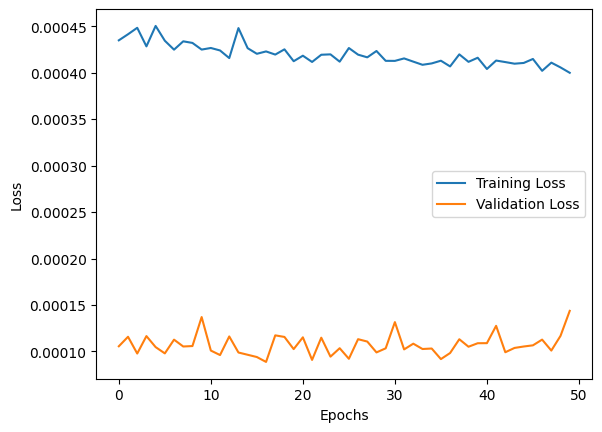

In [33]:
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
y_pred_1 = model_2.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

22/22 [==============================] - 0s 2ms/step


0.5486496571446159

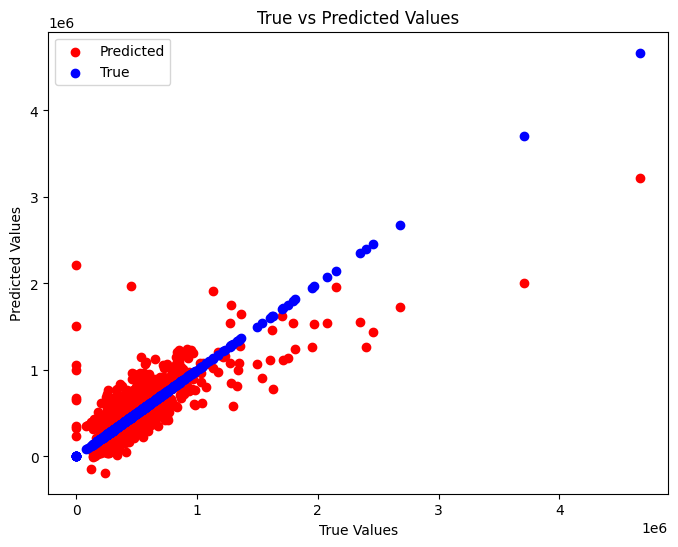

In [35]:
import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_1)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

5

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
print(iris_df.info())
print(iris_df.describe())

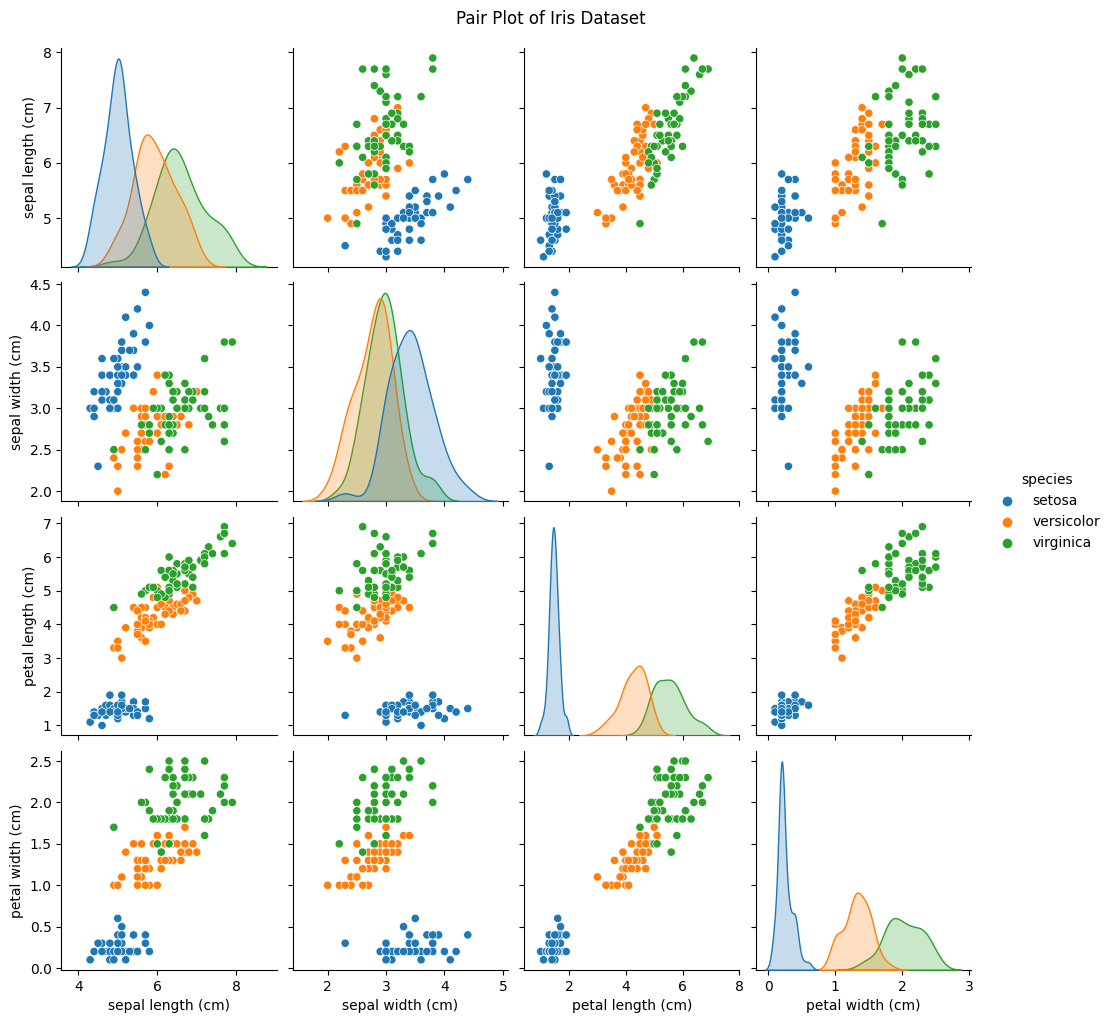

In [7]:
sns.pairplot(iris_df, hue='species', markers='o')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


<ipython-input-8-421b534ece35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


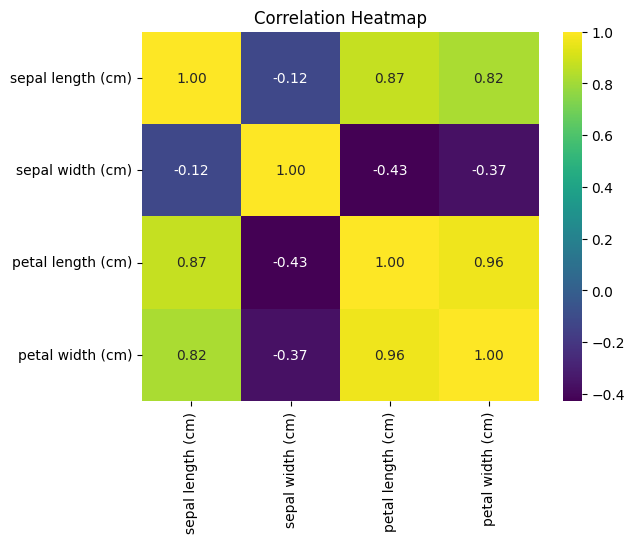

In [8]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

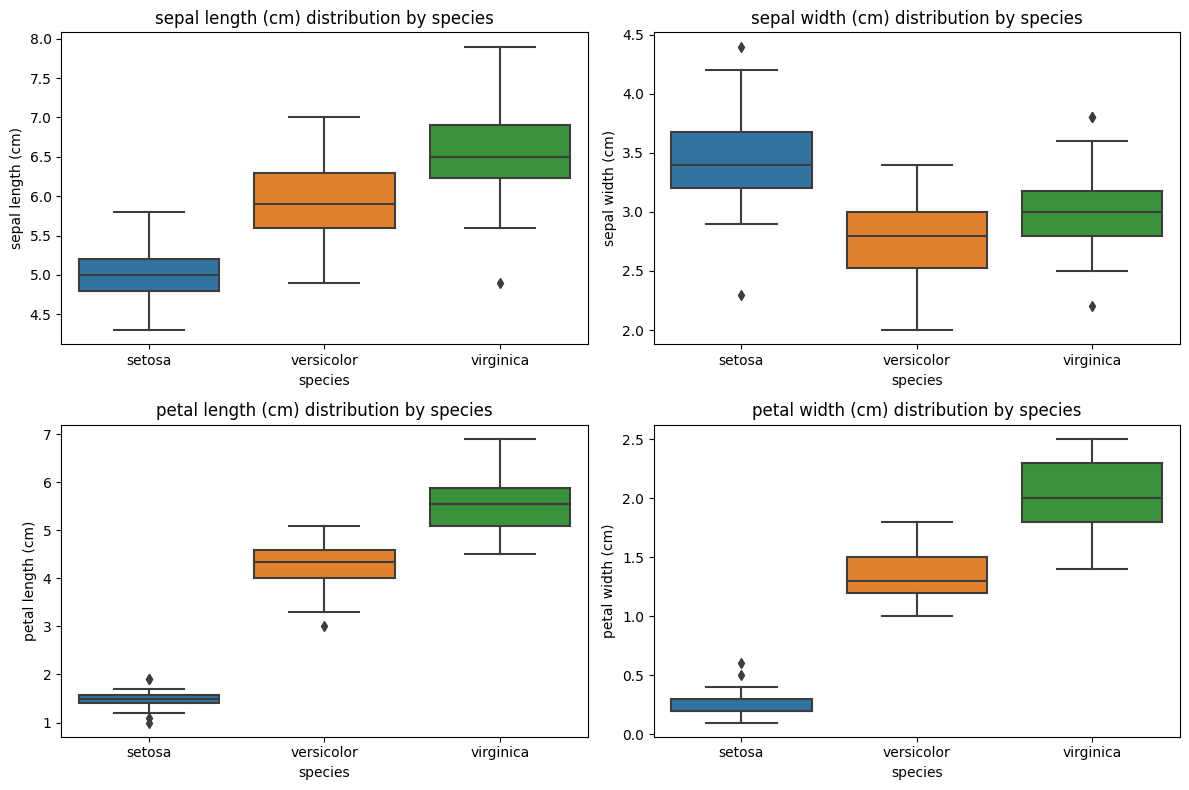

In [9]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f"{feature} distribution by species")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_train, X_eval, y_train, y_eval = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Evaluation set - Features:", X_eval.shape, "Labels:", y_eval.shape)


Training set - Features: (120, 4) Labels: (120,)
Evaluation set - Features: (30, 4) Labels: (30,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import numpy as np


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_eval_scaled)

In [ ]:
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_eval_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
centers = kmeans.cluster_centers_
